Data Segmentation

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [6]:
df = pd.read_csv('data_cleaned.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_10064\2599512217.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_cleaned.csv')


In [7]:
df['Risk'] = df['TotalClaims'] / df['TotalPremium']
df['ProfitMargin'] = df['TotalPremium'] - df['TotalClaims']

In [8]:
df.dropna(subset=['Risk', 'ProfitMargin'], inplace=True)

In [9]:
def perform_ttest(group_a, group_b, col):
    stat, p_value = ttest_ind(group_a[col], group_b[col], nan_policy='omit')
    return p_value

In [10]:
def perform_chi2test(group_a, group_b, col):
    contingency_table = pd.crosstab(group_a[col], group_b[col])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    return p_value

In [11]:
def print_result(p_value, hypothesis):
    if p_value < 0.05:
        print(f"Reject the null hypothesis: {hypothesis}")
    else:
        print(f"Fail to reject the null hypothesis: {hypothesis}")

In [12]:
def visualize_groups(group_a, group_b, col, group_name, xlabel, ylabel):
  
    combined = pd.concat([group_a.assign(Group=group_name[0]), group_b.assign(Group=group_name[1])])

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Group', y=col, data=combined)
    plt.title(f'Boxplot of {ylabel} by Group')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Group', y=col, data=combined, estimator=np.mean, ci='sd')
    plt.title(f'Mean {ylabel} Comparison by Group')
    plt.xlabel(xlabel)
    plt.ylabel(f'Mean {ylabel}')
    plt.show()

In [29]:

unique_provinces = df['Province'].unique()
unique_postal_codes = df['PostalCode'].unique()
unique_genders = df['Gender'].unique()

alpha_level = 0.05



In [21]:
for province in unique_provinces:
    print(f"\nHypothesis 1: No risk differences across provinces")
    province_a = df[df['Province'] == province]
    province_b = df[df['Province'] != province]  
    
    print(f"{province} sample size: {len(province_a)}")
    print(f"All other provinces sample size: {len(province_b)}")
    
    p_value = perform_ttest(province_a, province_b, 'Risk')
    print_result(p_value, f"There are no risk differences between {province} and all other provinces")
    
    


Hypothesis 1: No risk differences across provinces
Gauteng sample size: 240883
All other provinces sample size: 377731
Fail to reject the null hypothesis: There are no risk differences between Gauteng and all other provinces

Hypothesis 1: No risk differences across provinces


c:\Users\USER\Documents\OPLearning\10_Academy\Week_3\ven\Lib\site-packages\numpy\_core\_methods.py:136: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


KwaZulu-Natal sample size: 112172
All other provinces sample size: 506442
Fail to reject the null hypothesis: There are no risk differences between KwaZulu-Natal and all other provinces

Hypothesis 1: No risk differences across provinces
Mpumalanga sample size: 31668
All other provinces sample size: 586946
Fail to reject the null hypothesis: There are no risk differences between Mpumalanga and all other provinces

Hypothesis 1: No risk differences across provinces
Eastern Cape sample size: 19701
All other provinces sample size: 598913
Fail to reject the null hypothesis: There are no risk differences between Eastern Cape and all other provinces

Hypothesis 1: No risk differences across provinces
Western Cape sample size: 96789
All other provinces sample size: 521825
Fail to reject the null hypothesis: There are no risk differences between Western Cape and all other provinces

Hypothesis 1: No risk differences across provinces
Limpopo sample size: 18010
All other provinces sample size: 6

In [24]:
for postal_code in unique_postal_codes:
    print(f"\nHypothesis 2: No risk differences between zip codes")
    postal_a = df[df['PostalCode'] == postal_code]
    postal_b = df[df['PostalCode'] != postal_code]  
    
    print(f"{postal_code} sample size: {len(postal_a)}")
    print(f"All other postal codes sample size: {len(postal_b)}")
    
    p_value = perform_ttest(postal_a, postal_b, 'Risk')
    print_result(p_value, f"There are no risk differences between postal codes {postal_code} and all other postal codes")


Hypothesis 2: No risk differences between zip codes
1459 sample size: 401
All other postal codes sample size: 618213
Fail to reject the null hypothesis: There are no risk differences between postal codes 1459 and all other postal codes

Hypothesis 2: No risk differences between zip codes
1513 sample size: 72
All other postal codes sample size: 618542
Fail to reject the null hypothesis: There are no risk differences between postal codes 1513 and all other postal codes

Hypothesis 2: No risk differences between zip codes
1619 sample size: 1039
All other postal codes sample size: 617575
Fail to reject the null hypothesis: There are no risk differences between postal codes 1619 and all other postal codes

Hypothesis 2: No risk differences between zip codes
1625 sample size: 209
All other postal codes sample size: 618405
Fail to reject the null hypothesis: There are no risk differences between postal codes 1625 and all other postal codes

Hypothesis 2: No risk differences between zip codes

In [26]:
print("\nHypothesis 3: No significant margin differences between zip codes")
alpha_level = 0.05
for postal_code in unique_postal_codes:
    postal_a = df[df['PostalCode'] == postal_code]
    postal_b = df[df['PostalCode'] != postal_code]
    
    p_value = perform_ttest(postal_a, postal_b, 'ProfitMargin')
    print_result(p_value, f"There are no significant margin differences between postal codes {postal_code} and all other postal codes")
    



Hypothesis 3: No significant margin differences between zip codes
Fail to reject the null hypothesis: There are no significant margin differences between postal codes 1459 and all other postal codes
Fail to reject the null hypothesis: There are no significant margin differences between postal codes 1513 and all other postal codes
Fail to reject the null hypothesis: There are no significant margin differences between postal codes 1619 and all other postal codes
Fail to reject the null hypothesis: There are no significant margin differences between postal codes 1625 and all other postal codes
Fail to reject the null hypothesis: There are no significant margin differences between postal codes 1629 and all other postal codes
Fail to reject the null hypothesis: There are no significant margin differences between postal codes 1852 and all other postal codes
Fail to reject the null hypothesis: There are no significant margin differences between postal codes 2007 and all other postal codes
Fa

c:\Users\USER\Documents\OPLearning\10_Academy\Week_3\ven\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Fail to reject the null hypothesis: There are no significant margin differences between postal codes 5326 and all other postal codes
Fail to reject the null hypothesis: There are no significant margin differences between postal codes 194 and all other postal codes
Fail to reject the null hypothesis: There are no significant margin differences between postal codes 199 and all other postal codes
Fail to reject the null hypothesis: There are no significant margin differences between postal codes 200 and all other postal codes
Fail to reject the null hypothesis: There are no significant margin differences between postal codes 201 and all other postal codes
Fail to reject the null hypothesis: There are no significant margin differences between postal codes 208 and all other postal codes
Fail to reject the null hypothesis: There are no significant margin differences between postal codes 258 and all other postal codes
Fail to reject the null hypothesis: There are no significant margin differe


Hypothesis 4: No significant risk differences between Women and Men
Fail to reject the null hypothesis: There are no significant risk differences between Women and Men


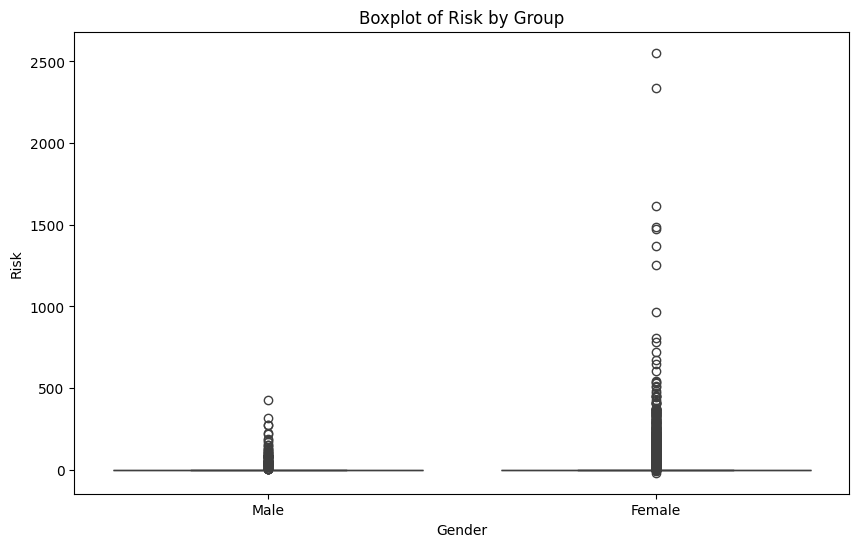

C:\Users\USER\AppData\Local\Temp\ipykernel_10064\1931128069.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Group', y=col, data=combined, estimator=np.mean, ci='sd')


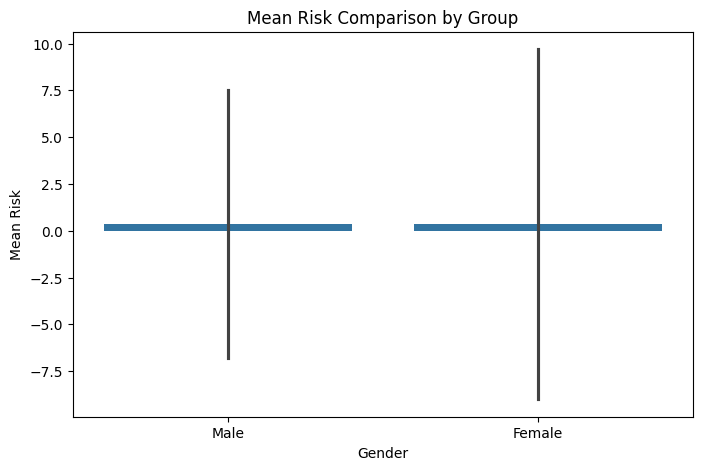

In [28]:
print("\nHypothesis 4: No significant risk differences between Women and Men")
male = df[df['Gender'] == 'Male']
female = df[df['Gender'] != 'Male']  
    
p_value = perform_ttest(male, female, 'Risk')
print_result(p_value, "There are no significant risk differences between Women and Men")
visualize_groups(male, female, 'Risk', ['Male', 'Female'], 'Gender', 'Risk')